In [1]:
# Moving averages and ... volume weighted??
import os
import sys
p = os.path.dirname(os.path.abspath('../algo-trading'))
sys.path.append(p)

os.chdir('../')
print(os.getcwd())

import matplotlib.pyplot as plt

/Users/benjaminsmith/Developer/algo-trading


In [2]:
os.environ.get("ALGO_DB")

'0.0.0.0'

In [70]:
SYMBOL = "thry".upper()
TYPE = "dollar"

In [71]:
from data_etl.dollar_bars import GetBars
raw_bars = GetBars(SYMBOL, bar_type='raw', resolution=1)

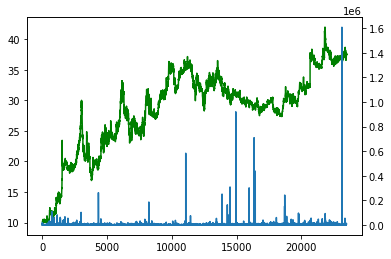

In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(raw_bars['c'],'g')
plt.twinx()
plt.plot(raw_bars['v'])

In [73]:
bars = GetBars(SYMBOL, sample_factor=1/60, bar_type=TYPE, resolution=1) #, LIMIT=500)

2021-11-29 16:56:16,743 DEBUG    reparsing 23480 bars with 1217756973.7560074 total dollar such that new bars have 3111815.09477685 quantity each.


In [74]:
for i in [50,100,150,200]:
    bars['MA_{}'.format(i)] = bars['c'].ewm(span=i, adjust=False).mean()
    bars['MA_{}'.format(i)].plot()
bars['c'].plot()

<AxesSubplot:>

In [75]:
plt.plot(raw_bars['imbalance_volume_weighted'])
plt.plot(raw_bars['imbalance_volume_weighted'].ewm(span=100, adjust=False).mean())
plt.plot(raw_bars['imbalance_volume_weighted'].ewm(span=200, adjust=False).mean())
plt.show()